Can openCV tell the difference between images and videos?

In [1]:
import cv2

In [2]:
im = cv2.imread("../data/challenging-60/432.png")

In [3]:
im.shape

(720, 1280, 3)

In [4]:
vid = cv2.imread("../data/internet/StationMBackground.mp4")

In [5]:
vid is None

True

Einops has a wildcard option if I recall correctly.

In [6]:
from einops import rearrange
import numpy as np
import torch

In [7]:
a = np.random.uniform(size=(3, 24, 24))
b = np.random.uniform(size=(10, 3, 24, 24))

In [8]:
def ten2arr(ten):
    """Convert ten2arr plus scaling"""
    arr = ten.cpu().detach().numpy()
    arr = np.clip(arr, 0, 1)
    arr = (arr * 255).astype(np.uint8)
    arr = rearrange(arr, "c h w -> h w c")
    return arr

In [9]:
c = rearrange(a, "c h w -> h w c")

In [10]:
# d = rearrange(b, "c h w -> h w c")

``
EinopsError:  Error while processing rearrange-reduction pattern "c h w -> h w c".
 Input tensor shape: (10, 3, 24, 24). Additional info: {}.
 Expected 3 dimensions, got 4
```

Nope, no dynamic axes allowed.

Testing hubconf

In [11]:
import torch

In [17]:
print(torch.hub.help("tnwei/waternet", "waternet", force_reload=True))

Downloading: "https://github.com/tnwei/waternet/archive/main.zip" to /home/tnwei/.cache/torch/hub/main.zip



    Args
    ----
    pretrained: bool
        Load pretrained weights. Defaults to True

    device:
        torch device. Defaults to None

    Returns
    -------
    preprocess: Preprocessing function before inference
    model: WaterNet model
    postprocess: Postprocessing function after inference

    Example usage:
    ```
    import torch
    import cv2

    # Load from torchhub
    preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
    model.eval();

    # Load one image using OpenCV
    im = cv2.imread("example.png")
    rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

    # Inference -> return numpy array (1, 3, H, W)
    rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
    out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
    out_im = postprocess(out_ten)
    ```
    


In [13]:
import torch
import cv2

# Load from torchhub
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet', force_reload=True)
model.eval();

Downloading: "https://github.com/tnwei/waternet/archive/main.zip" to /home/tnwei/.cache/torch/hub/main.zip


In [14]:
# Load one image using OpenCV
# im = cv2.imread("example.png") # already loaded im
rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
out_im = postprocess(out_ten)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

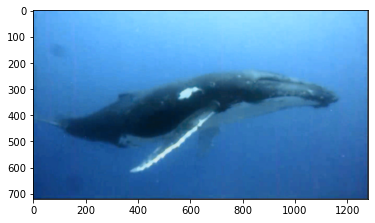

In [16]:
plt.imshow(out_im[0])

What error does OpenCV throw on non images?

In [18]:
notim = cv2.imread("data.py")

Conversion for pathlib Path to string that isn't linux specific?

In [20]:
from pathlib import Path

In [24]:
p = Path(".")

In [25]:
str(p)

'.'

In [26]:
p

PosixPath('.')

In [27]:
import os

In [28]:
# ref: https://stackoverflow.com/a/58963478/13095028
os.fspath(p)

'.'

In [29]:
p.is_file()

False

In [30]:
p.is_dir()

True

In [31]:
p.suffix

''

In [35]:
fdirs = list(p.glob("*"))

In [36]:
fdirs

[PosixPath('1.0-implement-arch.ipynb'),
 PosixPath('utils.py'),
 PosixPath('net.py'),
 PosixPath('2.0-load-old-files.ipynb'),
 PosixPath('6.0-existing-model-large-images.ipynb'),
 PosixPath('__pycache__'),
 PosixPath('trying-cli-things.ipynb'),
 PosixPath('6.1-existing-model-large-images.ipynb'),
 PosixPath('data.py'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('4.0-clahe-opencv-vs-matlab.ipynb'),
 PosixPath('5.0-transform-pipeline.ipynb'),
 PosixPath('extract_waternet_params.ipynb'),
 PosixPath('3.0-implement-transforms.ipynb')]

In [37]:
[i.suffix for i in fdirs]

['.ipynb',
 '.py',
 '.py',
 '.ipynb',
 '.ipynb',
 '',
 '.ipynb',
 '.ipynb',
 '.py',
 '',
 '.ipynb',
 '.ipynb',
 '.ipynb',
 '.ipynb']

Troubleshooting imwrite

In [55]:
funnyim = cv2.imread("/home/tnwei/projects/waternet/output/4/432.png")
funnyim = cv2.cvtColor(funnyim, cv2.COLOR_BGR2RGB)

In [56]:
funnyim.shape

(720, 1280, 3)

In [57]:
funnyim.dtype

dtype('uint8')

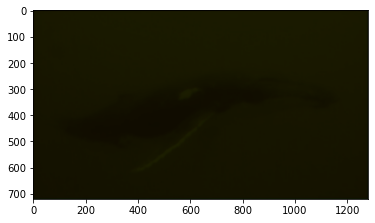

In [58]:
plt.imshow(funnyim)

Turns out it was bad weights. Redownloaded, no issue. But after a single run, it goes bad again! Sha256 sum of the model didn't reveal any changes.

In [59]:
npy1 = np.load("/home/tnwei/projects/waternet/output/17/432.npy")
npy2 = np.load("/home/tnwei/projects/waternet/output/18/432.npy")
npy3 = np.load("/home/tnwei/projects/waternet/output/19/432.npy")

In [65]:
npy1[0, :3], npy2[0, :3], npy3[0, :3]

(array([[7, 5, 1],
        [6, 5, 4],
        [5, 4, 3]], dtype=uint8),
 array([[5, 8, 0],
        [7, 7, 0],
        [9, 7, 2]], dtype=uint8),
 array([[ 6,  8,  5],
        [ 5, 11,  6],
        [ 5, 10,  6]], dtype=uint8))

Strange that the outputs are different every time!

... Oh. Must have goofed the weights loading.